# Goals
## 1 load MNIST [√]
## 2 put though locallity sensitive hashing to KC

---- Good Starting Point ----
## 3 generate unique time series of a'3 subset (n KC = 350)
Grab consistant set of ~100 hashes and compute time evolving novelty
## 4 Play with distnace sensitive bloom filters 

## 5 ff

In [23]:
%matplotlib inline
from nearest_neighbor_search import *
from read_data import *
from hashfunctions import *
import matplotlib.pyplot as plt

In [2]:
# Load MNIST
mnist_path = '/home/navlakha/projects/fly_hashing/data/mnist/mnist10k.txt'
mnist = read_generic_data(mnist_path, 10000, 784) # 10 000 x 784

In [36]:
num_kenyon = 2000
odor_space = 784
projection = 'SB6'
wta = 'top'
hash_length = round(num_kenyon*.05)
k = 50
M = create_projection_matrix(mnist , num_kenyon, projection) # each KC draws from ~6 PN
tag_space = compute_hash(M, mnist, num_kenyon)
tag_space = compute_wta(tag_space, wta, hash_length) #Only top 5% are allowed to fire

In [84]:
# look at performance for LSHZ
n_comp = 100
AP = np.zeros(n_comp)

for i in range(n_comp):

    _,d_true = compute_distances(i,mnist)
    true_ind = sorted(d_true)[:k]
    true_ind = [val[1] for val in true_ind]
    
    _,d_lsh = compute_distances(i,tag_space)
    lsh_ind = sorted(d_lsh)[:k]
    lsh_ind = [val[1] for val in lsh_ind]
    AP[i] = compute_AP(lsh_ind,true_ind)


In [90]:
AP.mean()
# MAP = 0.84

0.8426362188756904

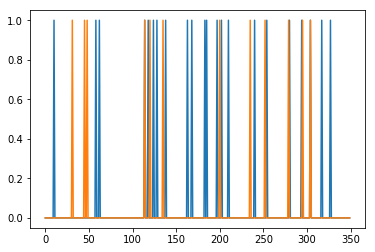

In [111]:
# Binarize and subset output for a'3 MBON
nKC_a3 = 350
KC_in = tag_space[:,:nKC_a3]
KC_in = KC_in>0

plt.plot(KC_in[0])
plt.plot(KC_in[1])

In [117]:
def hamming_distance(x1,x2):
    assert(len(x1)==len(x2))
    return sum(x1^x2) # ^ is xor

In [128]:
hamming_distance(KC_in[0],KC_in[1])

30

In [142]:
# compute typical hamming distances
temp = 1011
n_check = 1000
hams = np.zeros(n_check)
for i in range(n_check):
    hams[i] = hamming_distance(KC_in[i],KC_in[temp]) 

(array([   8.,   33.,  100.,  262.,  507.,  702.,  885.,  969.,  997.,
        1000.]),
 array([10. , 13.1, 16.2, 19.3, 22.4, 25.5, 28.6, 31.7, 34.8, 37.9, 41. ]),
 <a list of 10 Patch objects>)

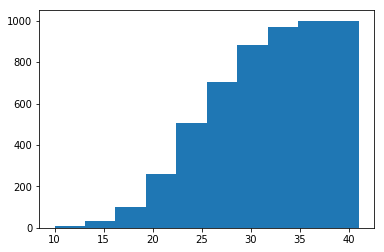

In [145]:
plt.hist(hams,cumulative=True)

In [139]:
np.shape(KC_in)

(10000, 350)

In [146]:
?plt.hist